##Importação dos Dados

In [1]:
!pip install pysus

In [2]:
import pandas as pd
import numpy as np

In [3]:
from pysus.online_data.SIM import get_CID9_table, get_CID10_table, get_municipios, get_ocupations

In [4]:
from pysus.ftp.databases.sim import SIM
from pysus.preprocessing.decoders import translate_variables_SIM
from pysus.preprocessing.SIM import group_and_count, redistribute_missing, redistribute_cid_chapter

sim = SIM().load()

##Criação da Base de Dados

In [5]:
df_sp_2016 = sim.download(sim.get_files("CID10",'sp',2016)).to_dataframe()
df_sp_2017 = sim.download(sim.get_files("CID10",'sp',2017)).to_dataframe()
df_sp_2018 = sim.download(sim.get_files("CID10",'sp',2018)).to_dataframe()
df_sp_2019 = sim.download(sim.get_files("CID10",'sp',2019)).to_dataframe()
df_sp_2020 = sim.download(sim.get_files("CID10",'sp',2020)).to_dataframe()
df_sp_2021 = sim.download(sim.get_files("CID10",'sp',2021)).to_dataframe()
df_sp_2022 = sim.download(sim.get_files("CID10",'sp',2022)).to_dataframe()

100%|██████████| 30.8M/30.8M [00:00<00:00, 7.75GB/s]
100%|██████████| 29.5M/29.5M [00:00<00:00, 3.82GB/s]
100%|██████████| 23.3M/23.3M [00:00<00:00, 5.53GB/s]
100%|██████████| 24.1M/24.1M [00:00<00:00, 4.42GB/s]
100%|██████████| 28.7M/28.7M [00:00<00:00, 4.29GB/s]
100%|██████████| 34.3M/34.3M [00:00<00:00, 4.79GB/s]
100%|██████████| 28.6M/28.6M [00:00<00:00, 6.63GB/s]


In [6]:
df_rj_2016 = sim.download(sim.get_files("CID10",'rj',2016)).to_dataframe()
df_rj_2017 = sim.download(sim.get_files("CID10",'rj',2017)).to_dataframe()
df_rj_2018 = sim.download(sim.get_files("CID10",'rj',2018)).to_dataframe()
df_rj_2019 = sim.download(sim.get_files("CID10",'rj',2019)).to_dataframe()
df_rj_2020 = sim.download(sim.get_files("CID10",'rj',2020)).to_dataframe()
df_rj_2021 = sim.download(sim.get_files("CID10",'rj',2021)).to_dataframe()
df_rj_2022 = sim.download(sim.get_files("CID10",'rj',2022)).to_dataframe()

100%|██████████| 14.5M/14.5M [00:00<00:00, 3.54GB/s]
100%|██████████| 14.1M/14.1M [00:00<00:00, 2.51GB/s]
100%|██████████| 10.9M/10.9M [00:00<00:00, 1.72GB/s]
100%|██████████| 11.3M/11.3M [00:00<00:00, 1.67GB/s]
100%|██████████| 13.8M/13.8M [00:00<00:00, 2.36GB/s]
100%|██████████| 15.0M/15.0M [00:00<00:00, 2.49GB/s]
100%|██████████| 11.9M/11.9M [00:00<00:00, 1.76GB/s]


In [7]:
df_mg_2016 = sim.download(sim.get_files("CID10",'mg',2016)).to_dataframe()
df_mg_2017 = sim.download(sim.get_files("CID10",'mg',2017)).to_dataframe()
df_mg_2018 = sim.download(sim.get_files("CID10",'mg',2018)).to_dataframe()
df_mg_2019 = sim.download(sim.get_files("CID10",'mg',2019)).to_dataframe()
df_mg_2020 = sim.download(sim.get_files("CID10",'mg',2020)).to_dataframe()
df_mg_2021 = sim.download(sim.get_files("CID10",'mg',2021)).to_dataframe()
df_mg_2022 = sim.download(sim.get_files("CID10",'mg',2022)).to_dataframe()

100%|██████████| 14.2M/14.2M [00:00<00:00, 3.49GB/s]
100%|██████████| 13.8M/13.8M [00:00<00:00, 3.38GB/s]
100%|██████████| 10.9M/10.9M [00:00<00:00, 1.75GB/s]
100%|██████████| 11.2M/11.2M [00:00<00:00, 2.00GB/s]
100%|██████████| 12.7M/12.7M [00:00<00:00, 1.82GB/s]
100%|██████████| 14.9M/14.9M [00:00<00:00, 3.83GB/s]
100%|██████████| 13.0M/13.0M [00:00<00:00, 2.05GB/s]


In [8]:
df_es_2016 = sim.download(sim.get_files("CID10",'es',2016)).to_dataframe()
df_es_2017 = sim.download(sim.get_files("CID10",'es',2017)).to_dataframe()
df_es_2018 = sim.download(sim.get_files("CID10",'es',2018)).to_dataframe()
df_es_2019 = sim.download(sim.get_files("CID10",'es',2019)).to_dataframe()
df_es_2020 = sim.download(sim.get_files("CID10",'es',2020)).to_dataframe()
df_es_2021 = sim.download(sim.get_files("CID10",'es',2021)).to_dataframe()
df_es_2022 = sim.download(sim.get_files("CID10",'es',2022)).to_dataframe()

100%|██████████| 2.41M/2.41M [00:00<00:00, 670MB/s]
100%|██████████| 2.52M/2.52M [00:00<00:00, 634MB/s]
100%|██████████| 1.97M/1.97M [00:00<00:00, 517MB/s]
100%|██████████| 2.06M/2.06M [00:00<00:00, 334MB/s]
100%|██████████| 2.40M/2.40M [00:00<00:00, 608MB/s]
100%|██████████| 2.63M/2.63M [00:00<00:00, 604MB/s]
100%|██████████| 2.25M/2.25M [00:00<00:00, 391MB/s]


In [9]:
# sp
df_sp_2016['ESTADO'] = 'São Paulo'
df_sp_2016['ANO'] = 2016
df_sp_2017['ESTADO'] = 'São Paulo'
df_sp_2017['ANO'] = 2017
df_sp_2018['ESTADO'] = 'São Paulo'
df_sp_2018['ANO'] = 2018
df_sp_2019['ESTADO'] = 'São Paulo'
df_sp_2019['ANO'] = 2019
df_sp_2020['ESTADO'] = 'São Paulo'
df_sp_2020['ANO'] = 2020
df_sp_2021['ESTADO'] = 'São Paulo'
df_sp_2021['ANO'] = 2021
df_sp_2022['ESTADO'] = 'São Paulo'
df_sp_2022['ANO'] = 2022

# rj
df_rj_2016['ESTADO'] = 'Rio de Janeiro'
df_rj_2016['ANO'] = 2016
df_rj_2017['ESTADO'] = 'Rio de Janeiro'
df_rj_2017['ANO'] = 2017
df_rj_2018['ESTADO'] = 'Rio de Janeiro'
df_rj_2018['ANO'] = 2018
df_rj_2019['ESTADO'] = 'Rio de Janeiro'
df_rj_2019['ANO'] = 2019
df_rj_2020['ESTADO'] = 'Rio de Janeiro'
df_rj_2020['ANO'] = 2020
df_rj_2021['ESTADO'] = 'Rio de Janeiro'
df_rj_2021['ANO'] = 2021
df_rj_2022['ESTADO'] = 'Rio de Janeiro'
df_rj_2022['ANO'] = 2022

# mg
df_mg_2016['ESTADO'] = 'Minas Gerais'
df_mg_2016['ANO'] = 2016
df_mg_2017['ESTADO'] = 'Minas Gerais'
df_mg_2017['ANO'] = 2017
df_mg_2018['ESTADO'] = 'Minas Gerais'
df_mg_2018['ANO'] = 2018
df_mg_2019['ESTADO'] = 'Minas Gerais'
df_mg_2019['ANO'] = 2019
df_mg_2020['ESTADO'] = 'Minas Gerais'
df_mg_2020['ANO'] = 2020
df_mg_2021['ESTADO'] = 'Minas Gerais'
df_mg_2021['ANO'] = 2021
df_mg_2022['ESTADO'] = 'Minas Gerais'
df_mg_2022['ANO'] = 2022

# es
df_es_2016['ESTADO'] = 'Espírito Santo'
df_es_2016['ANO'] = 2016
df_es_2017['ESTADO'] = 'Espírito Santo'
df_es_2017['ANO'] = 2017
df_es_2018['ESTADO'] = 'Espírito Santo'
df_es_2018['ANO'] = 2018
df_es_2019['ESTADO'] = 'Espírito Santo'
df_es_2019['ANO'] = 2019
df_es_2020['ESTADO'] = 'Espírito Santo'
df_es_2020['ANO'] = 2020
df_es_2021['ESTADO'] = 'Espírito Santo'
df_es_2021['ANO'] = 2021
df_es_2022['ESTADO'] = 'Espírito Santo'
df_es_2022['ANO'] = 2022

In [10]:
df = pd.concat([df_sp_2016, df_sp_2017, df_sp_2018, df_sp_2019, df_sp_2020, df_sp_2021, df_sp_2022,
                df_rj_2016, df_rj_2017, df_rj_2018, df_rj_2019, df_rj_2020, df_rj_2021, df_rj_2022,
                df_mg_2016, df_mg_2017, df_mg_2018, df_mg_2019, df_mg_2020, df_mg_2021, df_mg_2022,
                df_es_2016, df_es_2017, df_es_2018, df_es_2019, df_es_2020, df_es_2021, df_es_2022],
                ignore_index=True)

##Tratamento dos Dados

In [11]:
df['SEXO'] = df['SEXO'].astype('object')

In [12]:
variables = ['CODMUNRES','SEXO','IDADE_ANOS','CID10_CHAPTER']

df = translate_variables_SIM(
    df,
    age_classes=True,
    classify_cid10_chapters=True,
)

2024-06-05 01:33:13.911 | DEBUG    | pysus.online_data.SIM:get_municipios:209 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2024-06-05 01:33:14.067 | DEBUG    | pysus.online_data.SIM:get_municipios:213 - Changing FTP work dir to: /dissemin/publicos/SIM/CID10/TABELAS
2024-06-05 01:33:14.070 | INFO     | pysus.online_data.SIM:get_municipios:223 - Local parquet file found at /root/pysus/SIM_CADMUN_.parquet
2024-06-05 01:35:18.601 | DEBUG    | pysus.online_data.SIM:get_CID10_chapters_table:71 - Stablishing connection with ftp.datasus.gov.br.
220 Microsoft FTP Service
2024-06-05 01:35:18.758 | DEBUG    | pysus.online_data.SIM:get_CID10_chapters_table:75 - Changing FTP work dir to: /dissemin/publicos/SIM/CID10/TABELAS
2024-06-05 01:35:18.760 | INFO     | pysus.online_data.SIM:get_CID10_chapters_table:85 - Local parquet file found at /root/pysus/SIM_CIDCAP10_.parquet


In [13]:
counts = group_and_count(df,variables)
counts["COUNTS_ORIGINAL"] = counts["COUNTS"]
nan_string = 'missing'

/usr/local/lib/python3.10/dist-packages/pysus/preprocessing/SIM.py:42: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = dataframe.groupby(group_columns).size().reset_index(name=count_column)


In [14]:
counts = redistribute_missing(counts,['CODMUNRES','SEXO','IDADE_ANOS'],nan_string=nan_string)
counts[counts["COUNTS"] > 1]

,CODMUNRES,SEXO,IDADE_ANOS,CID10_CHAPTER,COUNTS,COUNTS_ORIGINAL
768,3100104.0,Feminino,"[40.0, 41.0)",9,2.0,2.0
1027,3100104.0,Feminino,"[54.0, 55.0)",2,2.0,2.0
1236,3100104.0,Feminino,"[65.0, 66.0)",2,2.0,2.0
1293,3100104.0,Feminino,"[68.0, 69.0)",2,2.0,2.0
1311,3100104.0,Feminino,"[69.0, 70.0)",1,2.0,2.0
...,...,...,...,...,...,...
8741739,NA,NA,NA,11,3.0,3.0
8741742,NA,NA,NA,14,2.0,2.0
8741744,NA,NA,NA,16,2.0,2.0
8741746,NA,NA,NA,18,266.0,266.0


In [15]:
import re

df.dropna(subset=['DTOBITO'], inplace=True)
df['DTOBITO'] = pd.to_datetime(df['DTOBITO'], format='%d%m%Y')

def extrai_idade(intervalo):
    match = re.match(r'\[(\d+\.?\d*)', intervalo)
    if match:
        return float(match.group(1))
    return None

df['IDADE'] = df['IDADE_ANOS'].astype(str).apply(extrai_idade)

df[['DTCADASTRO', 'DTOBITO', 'IDADE_ANOS', 'IDADE']]

,DTCADASTRO,DTOBITO,IDADE_ANOS,IDADE
0,10062016,2016-05-31,"[76.0, 77.0)",76.0
1,06062016,2016-05-31,"[66.0, 67.0)",66.0
2,31052016,2016-05-31,"[63.0, 64.0)",63.0
3,02062016,2016-05-31,"[87.0, 88.0)",87.0
4,10062016,2016-05-31,"[90.0, inf)",90.0
...,...,...,...,...
4645903,17092022,2022-08-17,"[90.0, inf)",90.0
4645904,29082022,2022-08-22,"[90.0, inf)",90.0
4645905,18102022,2022-10-14,"[39.0, 40.0)",39.0
4645906,29082022,2022-08-25,"[74.0, 75.0)",74.0


##Criação dos Gráficos

In [16]:
df.head()

,CONTADOR,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,...,NUDIASINF,DTCADINF,MORTEPARTO,DTCONCASO,FONTESINF,ALTCAUSA,ESTADO,ANO,IDADE_ANOS,CID10_CHAPTER
0,120001,1,2,2016-05-31,2305,835,354000,23101939,76.0,Feminino,...,,,,,,,São Paulo,2016,"[76.0, 77.0)",9
1,120002,1,2,2016-05-31,1225,829,292800,26061949,66.0,Masculino,...,,,,,,,São Paulo,2016,"[66.0, 67.0)",9
2,120003,1,2,2016-05-31,0030,835,350080,01101952,63.0,Masculino,...,,,,,,,São Paulo,2016,"[63.0, 64.0)",6
3,120004,1,2,2016-05-31,1700,127,,08061928,87.0,Feminino,...,,,,,,,São Paulo,2016,"[87.0, 88.0)",9
4,120005,1,2,2016-05-31,1157,835,354060,08101924,90.0,Masculino,...,,,,,,,São Paulo,2016,"[90.0, inf)",9


In [17]:
df.columns

Index(['CONTADOR', 'ORIGEM', 'TIPOBITO', 'DTOBITO', 'HORAOBITO', 'NATURAL',
       'CODMUNNATU', 'DTNASC', 'IDADE', 'SEXO', 'RACACOR', 'ESTCIV', 'ESC',
       'ESC2010', 'SERIESCFAL', 'OCUP', 'CODMUNRES', 'LOCOCOR', 'CODESTAB',
       'ESTABDESCR', 'CODMUNOCOR', 'IDADEMAE', 'ESCMAE', 'ESCMAE2010',
       'SERIESCMAE', 'OCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'GRAVIDEZ',
       'SEMAGESTAC', 'GESTACAO', 'PARTO', 'OBITOPARTO', 'PESO', 'TPMORTEOCO',
       'OBITOGRAV', 'OBITOPUERP', 'ASSISTMED', 'EXAME', 'CIRURGIA',
       'NECROPSIA', 'LINHAA', 'LINHAB', 'LINHAC', 'LINHAD', 'LINHAII',
       'CAUSABAS', 'CB_PRE', 'CRM', 'COMUNSVOIM', 'DTATESTADO', 'CIRCOBITO',
       'ACIDTRAB', 'FONTE', 'NUMEROLOTE', 'TPPOS', 'DTINVESTIG', 'CAUSABAS_O',
       'DTCADASTRO', 'ATESTANTE', 'STCODIFICA', 'CODIFICADO', 'VERSAOSIST',
       'VERSAOSCB', 'FONTEINV', 'DTRECEBIM', 'ATESTADO', 'DTRECORIGA',
       'CAUSAMAT', 'ESCMAEAGR1', 'ESCFALAGR1', 'STDOEPIDEM', 'STDONOVA',
       'DIFDATA', 'NUDIASOBCO', 'NUD

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

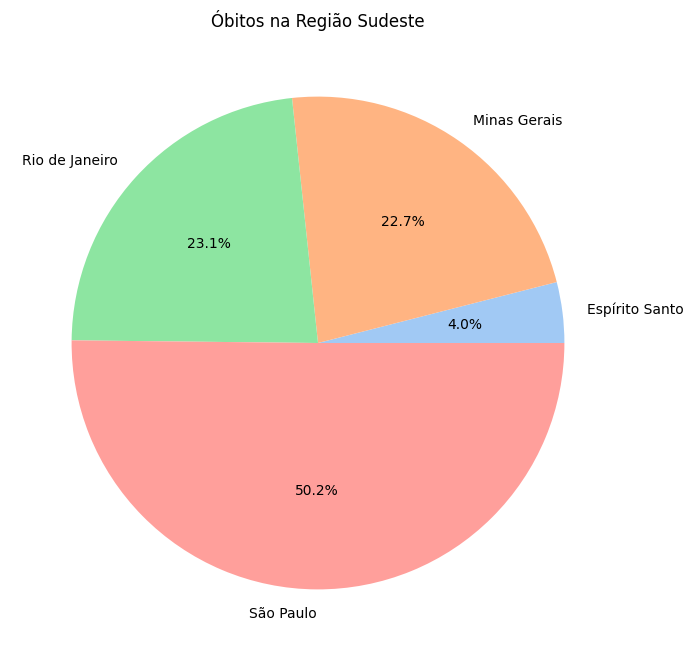

In [19]:
Obitos_Estado = df.groupby('ESTADO').size().reset_index(name='total_obitos')

plt.figure(figsize=(10, 8))
plt.pie(Obitos_Estado['total_obitos'], labels=Obitos_Estado['ESTADO'], autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Óbitos na Região Sudeste')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

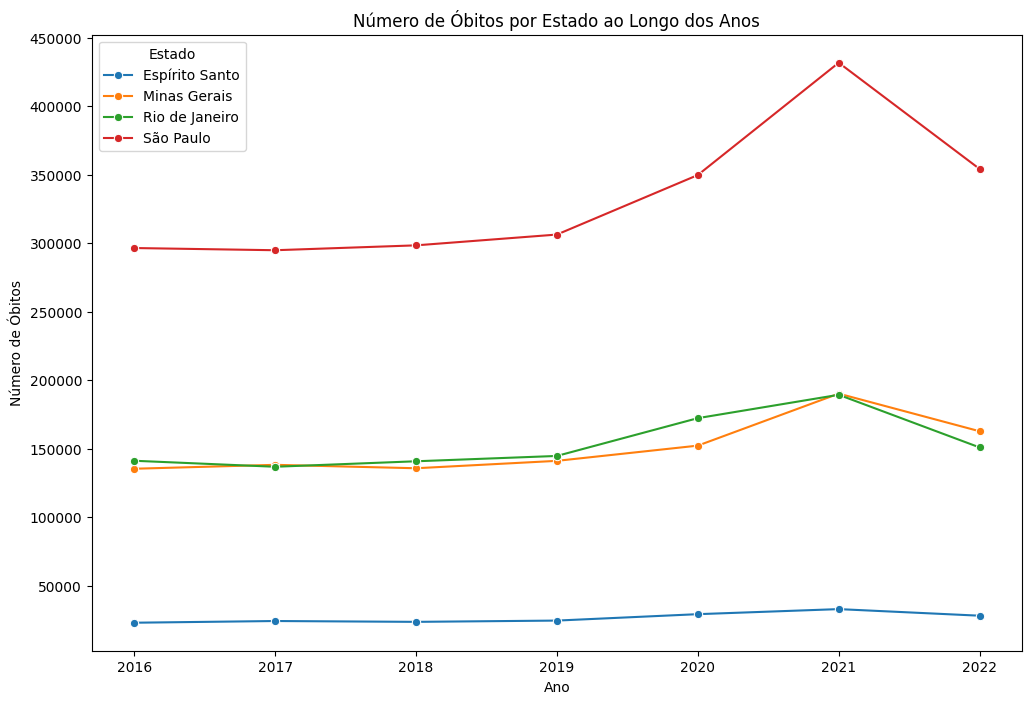

In [20]:
df_counts = df.groupby(['ESTADO', 'ANO']).size().reset_index(name='obitos')

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_counts, x='ANO', y='obitos', hue='ESTADO', marker='o')

plt.title('Número de Óbitos por Estado ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Número de Óbitos')
plt.legend(title='Estado')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

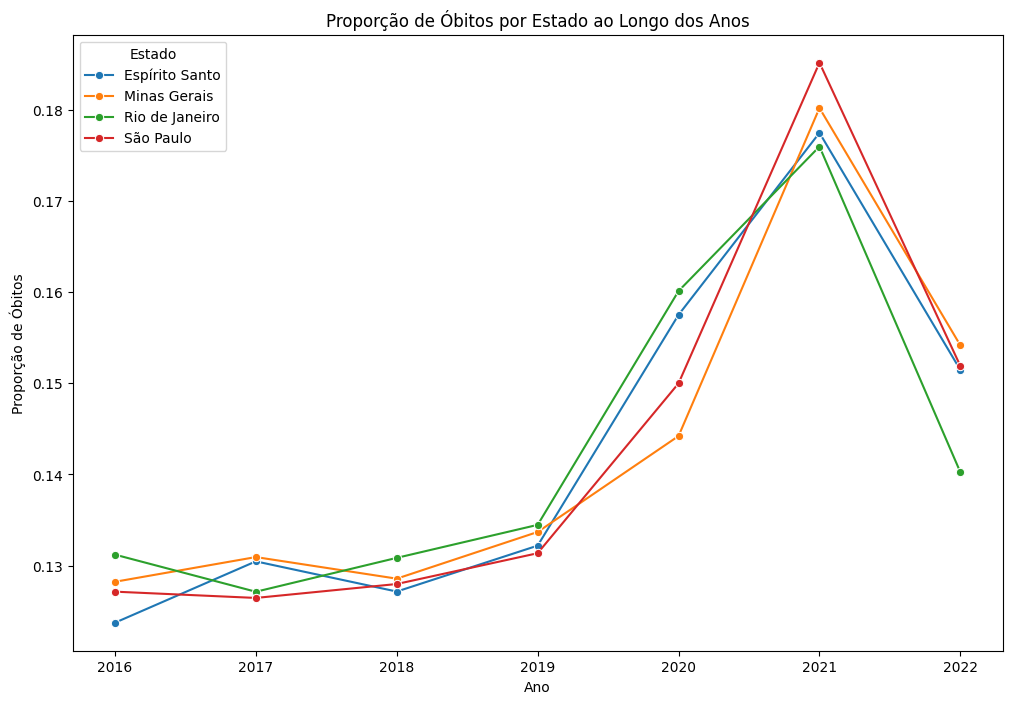

In [24]:
df_counts = df.groupby(['ESTADO', 'ANO']).size().reset_index(name='obitos')

total_obitos_por_estado = df_counts.groupby('ESTADO')['obitos'].sum().reset_index(name='total_obitos')

df_counts = pd.merge(df_counts, total_obitos_por_estado, on='ESTADO')

df_counts['proporcao_obitos'] = df_counts['obitos'] / df_counts['total_obitos']

plt.figure(figsize=(12, 8))
sns.lineplot(data=df_counts, x='ANO', y='proporcao_obitos', hue='ESTADO', marker='o')

plt.title('Proporção de Óbitos por Estado ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Proporção de Óbitos')
plt.legend(title='Estado')

plt.show()

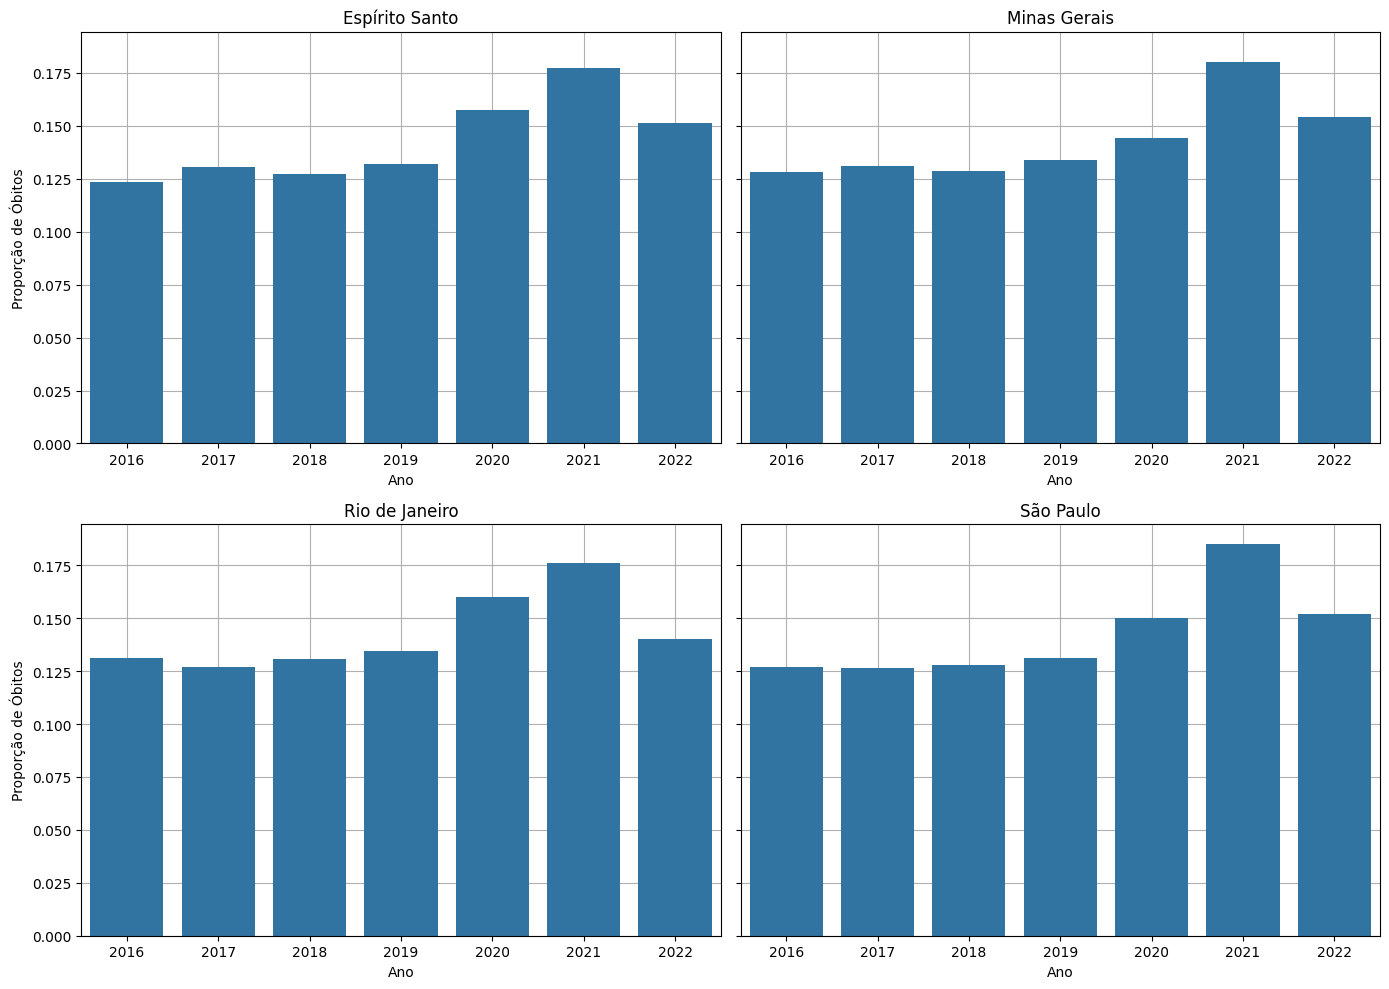

In [21]:
total_obitos = df_counts.groupby('ESTADO')['obitos'].transform('sum')

# Normalize the number of deaths
df_counts['obitos_normalized'] = df_counts['obitos'] / total_obitos

# Select the four states to plot
states_to_plot = df_counts['ESTADO'].unique()  # Adjust this if you have specific states in mind

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each state in a separate subplot
for i, estado in enumerate(states_to_plot):
    state_data = df_counts[df_counts['ESTADO'] == estado]
    sns.barplot(ax=axes[i], x='ANO', y='obitos_normalized', data=state_data, zorder=2)
    axes[i].set_title(estado)
    axes[i].set_xlabel('Ano')
    axes[i].set_ylabel('Proporção de Óbitos')
    axes[i].grid(True, zorder=1)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

<ipython-input-22-53611f0e34f3>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ESTADO', y='DIFDATA', data=mean_difdata_by_state, palette='viridis', zorder=2)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarnin

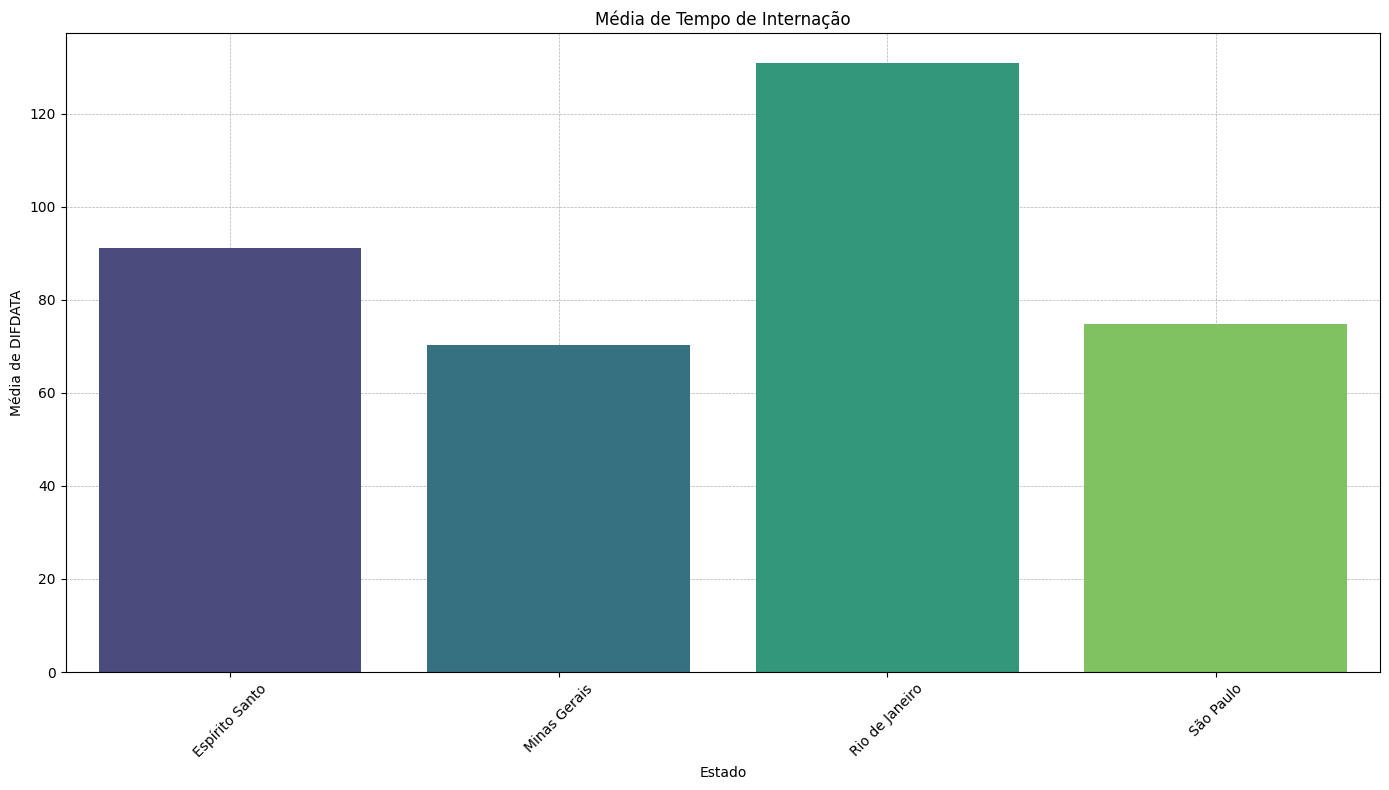

In [22]:
df['DIFDATA'] = pd.to_numeric(df['DIFDATA'], errors='coerce')
df = df.dropna(subset=['DIFDATA'])

mean_difdata_by_state = df.groupby('ESTADO')['DIFDATA'].mean().reset_index()

plt.figure(figsize=(14, 8))
sns.barplot(x='ESTADO', y='DIFDATA', data=mean_difdata_by_state, palette='viridis', zorder=2)

plt.title('Média de Tempo de Internação')
plt.xlabel('Estado')
plt.ylabel('Média de DIFDATA')

plt.xticks(rotation=45)

plt.grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)

plt.tight_layout()
plt.show()


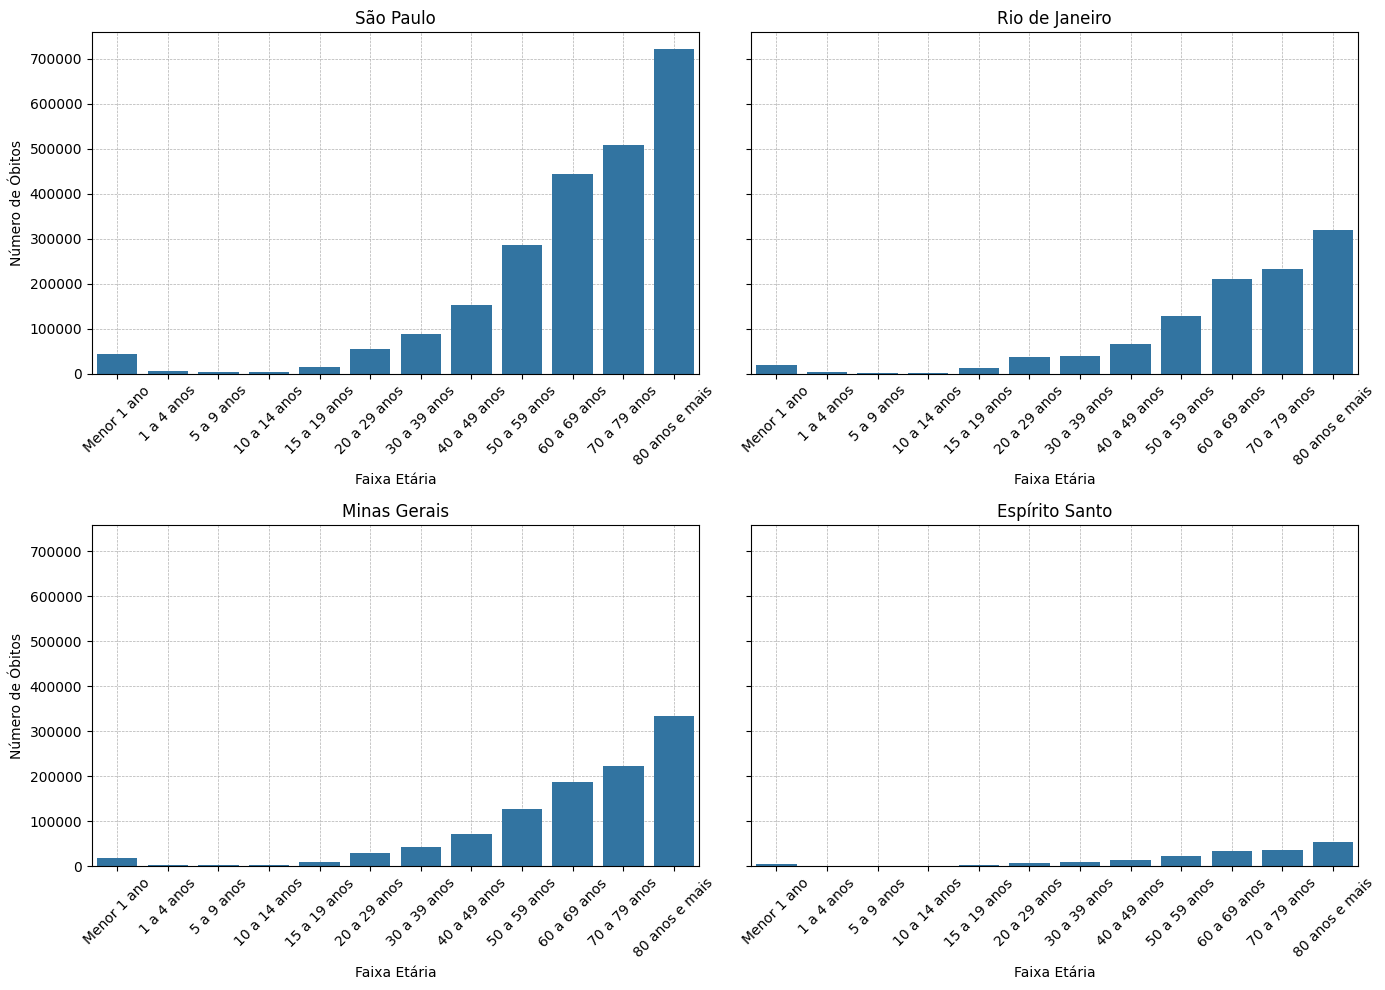

In [22]:
bins = [-1, 0, 4, 9, 14, 19, 29, 39, 49, 59, 69, 79, float('inf')]
labels = [
    'Menor 1 ano', '1 a 4 anos', '5 a 9 anos', '10 a 14 anos', '15 a 19 anos',
    '20 a 29 anos', '30 a 39 anos', '40 a 49 anos', '50 a 59 anos', '60 a 69 anos',
    '70 a 79 anos', '80 anos e mais'
]

df['faixa_etaria'] = pd.cut(df['IDADE'], bins=bins, labels=labels)

states_to_plot = df['ESTADO'].unique()

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

axes = axes.flatten()

for i, estado in enumerate(states_to_plot):
    state_data = df[df['ESTADO'] == estado]
    faixa_etaria_counts = state_data['faixa_etaria'].value_counts().reindex(labels, fill_value=0).reset_index()
    faixa_etaria_counts.columns = ['faixa_etaria', 'count']
    sns.barplot(ax=axes[i], x='faixa_etaria', y='count', data=faixa_etaria_counts, zorder=2)
    axes[i].set_title(estado)
    axes[i].set_xlabel('Faixa Etária')
    axes[i].set_ylabel('Número de Óbitos')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)

plt.tight_layout()
plt.show()

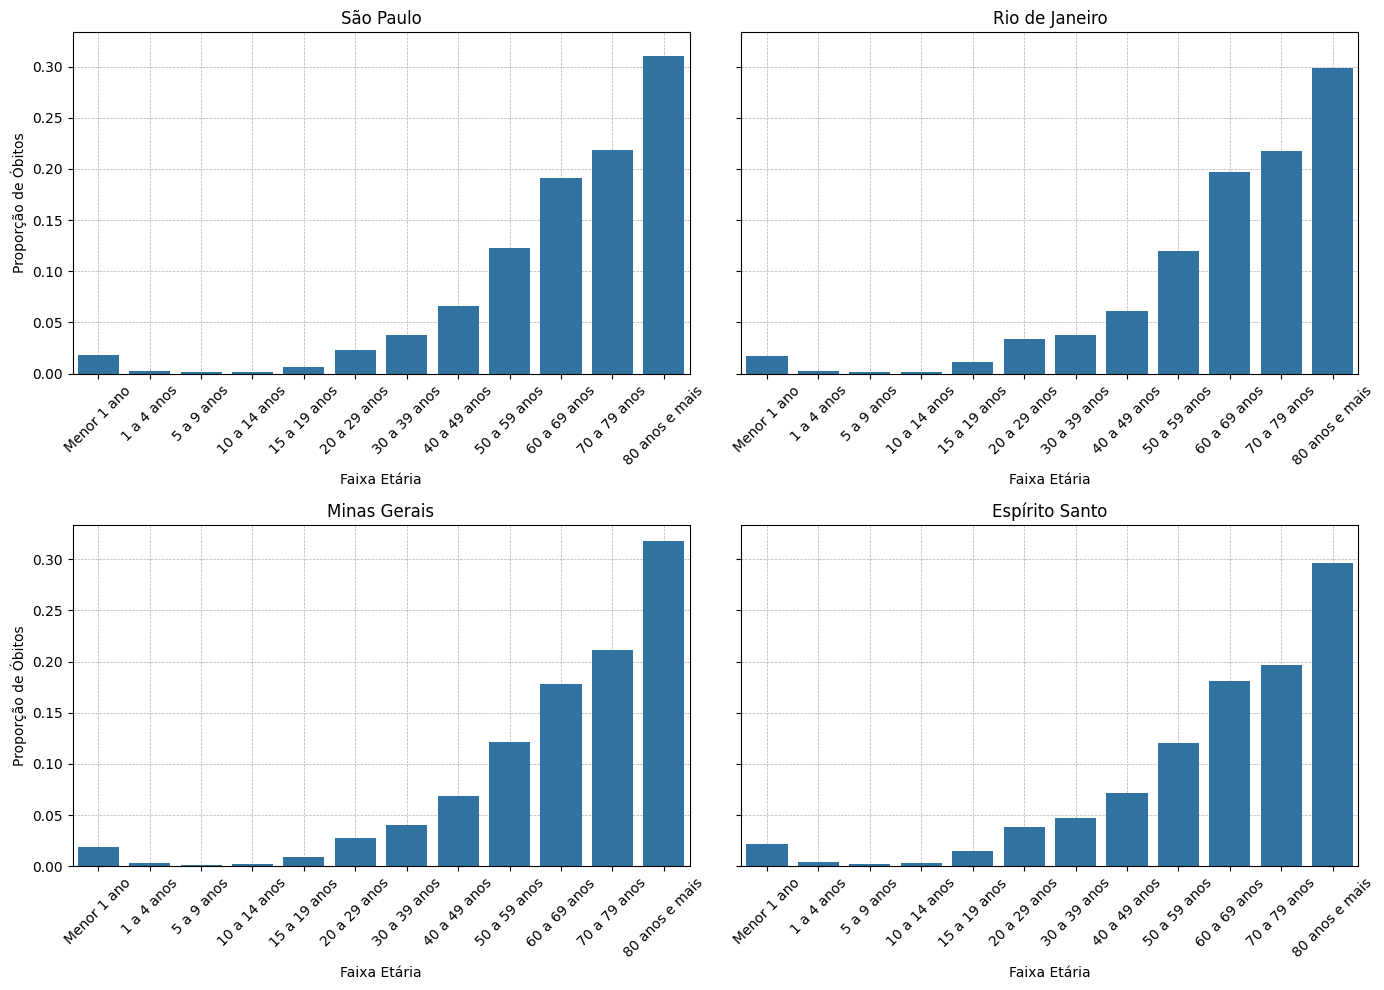

In [23]:
bins = [-1, 0, 4, 9, 14, 19, 29, 39, 49, 59, 69, 79, float('inf')]
labels = [
    'Menor 1 ano', '1 a 4 anos', '5 a 9 anos', '10 a 14 anos', '15 a 19 anos',
    '20 a 29 anos', '30 a 39 anos', '40 a 49 anos', '50 a 59 anos', '60 a 69 anos',
    '70 a 79 anos', '80 anos e mais'
]

df['faixa_etaria'] = pd.cut(df['IDADE'], bins=bins, labels=labels)

states_to_plot = df['ESTADO'].unique()

fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

axes = axes.flatten()

for i, estado in enumerate(states_to_plot):
    state_data = df[df['ESTADO'] == estado]
    faixa_etaria_counts = state_data['faixa_etaria'].value_counts().reindex(labels, fill_value=0).reset_index()
    faixa_etaria_counts.columns = ['faixa_etaria', 'count']
    faixa_etaria_counts['proportion'] = faixa_etaria_counts['count'] / faixa_etaria_counts['count'].sum()
    sns.barplot(ax=axes[i], x='faixa_etaria', y='proportion', data=faixa_etaria_counts, zorder=2)
    axes[i].set_title(estado)
    axes[i].set_xlabel('Faixa Etária')
    axes[i].set_ylabel('Proporção de Óbitos')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(True, which='both', linestyle='--', linewidth=0.5, zorder=1)

plt.tight_layout()
plt.show()
